<a href="https://colab.research.google.com/github/metinuslu/blm5103_cv_project/blob/main/Classification_with_embeddings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv('/content/drive/My Drive/ImgEmbeddingwithInception-v3.csv')

In [4]:
df

,ImgId,ImgName,Title,Genre1,Genre2,Genre3,IMDBScore,ImdbLink,Poster,0,...,2038,2039,2040,2041,2042,2043,2044,2045,2046,2047
0,2461,2461.jpg,Richard III (1912),Drama,NaN,NaN,5.7,http://www.imdb.com/title/tt2461,https://images-na.ssl-images-amazon.com/images...,1.120167,...,0.120914,0.326730,1.602758,0.236465,0.982730,0.873873,0.634736,0.203874,0.309919,0.000000
1,2544,2544.jpg,TrÌ_dgÌ´rdsmÌ_staren (1912),Drama,NaN,NaN,6.4,http://www.imdb.com/title/tt2544,https://images-na.ssl-images-amazon.com/images...,0.980303,...,1.083089,0.156347,1.686408,0.581614,0.938287,0.357445,0.500277,0.499020,1.786915,0.466574
2,2795,2795.jpg,Death's Marathon (1913),Drama,Drama,Romance,6.2,http://www.imdb.com/title/tt2795,https://images-na.ssl-images-amazon.com/images...,0.186914,...,0.999030,2.850239,0.000000,0.000000,0.074142,0.018904,0.046755,0.418609,0.000000,0.512234
3,2844,2844.jpg,FantÌ«mas: In the Shadow of the Guillotine (1913),Crime,Drama,NaN,6.9,http://www.imdb.com/title/tt2844,https://images-na.ssl-images-amazon.com/images...,2.447649,...,0.392086,3.200439,1.317286,1.617085,0.047113,1.463167,0.731855,0.000000,1.128354,0.648857
4,2985,2985.jpg,The House of Darkness (1913),Drama,Drama,NaN,6.1,http://www.imdb.com/title/tt2985,https://images-na.ssl-images-amazon.com/images...,0.971105,...,1.134356,1.177919,0.135385,0.232184,0.885135,0.494610,0.054025,0.765706,0.036431,0.546935
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
806,25555,25555.jpg,Nana (1934),Drama,NaN,NaN,6.1,http://www.imdb.com/title/tt25555,https://images-na.ssl-images-amazon.com/images...,0.265020,...,2.227381,1.900658,0.871680,1.175177,0.000000,0.160181,1.413354,1.205035,0.723482,1.083786
807,25580,25580.jpg,Now and Forever (1934),Drama,Romance,NaN,6.6,http://www.imdb.com/title/tt25580,https://images-na.ssl-images-amazon.com/images...,1.011291,...,0.617583,1.609574,0.313182,0.742604,0.042456,0.095610,0.028068,0.368099,0.738532,0.081123
808,25586,25586.jpg,Of Human Bondage (1934),Drama,Romance,NaN,7.3,http://www.imdb.com/title/tt25586,https://images-na.ssl-images-amazon.com/images...,0.276984,...,0.743920,2.871187,1.032354,0.043246,0.093723,0.012855,0.478842,0.516208,0.367655,0.928199
809,25590,25590.jpg,The Old Fashioned Way (1934),Comedy,NaN,NaN,7.6,http://www.imdb.com/title/tt25590,https://images-na.ssl-images-amazon.com/images...,0.277334,...,1.454321,2.956172,0.617356,0.256982,1.148565,1.267959,1.159810,0.294165,0.057756,0.286850


In [5]:
y = df['Genre1']

In [6]:
y.value_counts()

Drama        357
Comedy       317
Crime         84
Adventure     53
Name: Genre1, dtype: int64

In [7]:
X = df.drop(df.columns[0:9], axis=1)

In [8]:
X

,0,1,2,3,4,5,6,7,8,9,...,2038,2039,2040,2041,2042,2043,2044,2045,2046,2047
0,1.120167,0.285090,1.412310,0.485370,0.681111,0.507927,0.126890,0.503778,0.297837,2.033314,...,0.120914,0.326730,1.602758,0.236465,0.982730,0.873873,0.634736,0.203874,0.309919,0.000000
1,0.980303,0.874281,1.072389,0.164270,0.087253,0.451359,0.002404,0.709018,0.231277,0.553510,...,1.083089,0.156347,1.686408,0.581614,0.938287,0.357445,0.500277,0.499020,1.786915,0.466574
2,0.186914,0.056588,0.043026,0.313178,0.324932,0.114999,0.378990,0.381684,0.002025,0.421505,...,0.999030,2.850239,0.000000,0.000000,0.074142,0.018904,0.046755,0.418609,0.000000,0.512234
3,2.447649,0.710928,1.633987,1.159360,0.508022,0.773467,0.212990,0.404398,0.000000,0.853661,...,0.392086,3.200439,1.317286,1.617085,0.047113,1.463167,0.731855,0.000000,1.128354,0.648857
4,0.971105,0.610472,1.262399,0.588769,0.666165,0.489303,0.710687,0.271924,0.812397,0.510773,...,1.134356,1.177919,0.135385,0.232184,0.885135,0.494610,0.054025,0.765706,0.036431,0.546935
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
806,0.265020,0.415121,0.140972,0.185513,0.526427,0.841352,0.841497,0.429606,0.409153,0.769570,...,2.227381,1.900658,0.871680,1.175177,0.000000,0.160181,1.413354,1.205035,0.723482,1.083786
807,1.011291,0.382014,0.609472,0.163646,0.253946,0.395673,0.031231,1.850853,0.508603,0.194641,...,0.617583,1.609574,0.313182,0.742604,0.042456,0.095610,0.028068,0.368099,0.738532,0.081123
808,0.276984,0.130430,0.058326,0.195521,0.278545,0.046646,0.022423,0.000000,0.000000,1.293555,...,0.743920,2.871187,1.032354,0.043246,0.093723,0.012855,0.478842,0.516208,0.367655,0.928199
809,0.277334,0.079464,0.486898,0.876634,1.004011,0.267646,0.440350,1.523518,0.217958,0.854031,...,1.454321,2.956172,0.617356,0.256982,1.148565,1.267959,1.159810,0.294165,0.057756,0.286850


In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
# Encoding
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

In [11]:
y_test_encoded.min()

0

In [12]:
#  Modeli oluştur
model = Sequential()
model.add(Dense(1024, input_dim=X.shape[1], activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(512,  activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dense(4, activation='softmax'))

In [18]:
adam = Adam(learning_rate=0.0001)

In [19]:
model.compile(loss='sparse_categorical_crossentropy', optimizer= adam , metrics=['accuracy'])

In [20]:
model.fit(X_train, y_train_encoded, epochs=25, batch_size=32, validation_data=(X_test, y_test_encoded))

Epoch 1/25
21/21 [==============================] - 3s 67ms/step - loss: 1.2609 - accuracy: 0.4028 - val_loss: 1.1548 - val_accuracy: 0.4601
Epoch 2/25
21/21 [==============================] - 1s 55ms/step - loss: 1.2168 - accuracy: 0.4398 - val_loss: 1.1524 - val_accuracy: 0.4233
Epoch 3/25
21/21 [==============================] - 1s 55ms/step - loss: 1.2155 - accuracy: 0.4429 - val_loss: 1.1659 - val_accuracy: 0.4601
Epoch 4/25
21/21 [==============================] - 1s 55ms/step - loss: 1.2083 - accuracy: 0.4460 - val_loss: 1.1764 - val_accuracy: 0.4540
Epoch 5/25
21/21 [==============================] - 1s 40ms/step - loss: 1.1938 - accuracy: 0.4475 - val_loss: 1.1568 - val_accuracy: 0.4294
Epoch 6/25
21/21 [==============================] - 1s 38ms/step - loss: 1.2131 - accuracy: 0.4306 - val_loss: 1.1492 - val_accuracy: 0.4847
Epoch 7/25
21/21 [==============================] - 1s 39ms/step - loss: 1.1654 - accuracy: 0.4645 - val_loss: 1.1729 - val_accuracy: 0.4663
Epoch 8/25
21

In [21]:
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
accuracy = accuracy_score(y_test_encoded, y_pred_classes)
print(f'Doğruluk: {accuracy}')

6/6 [==============================] - 0s 10ms/step
Doğruluk: 0.558282208588957


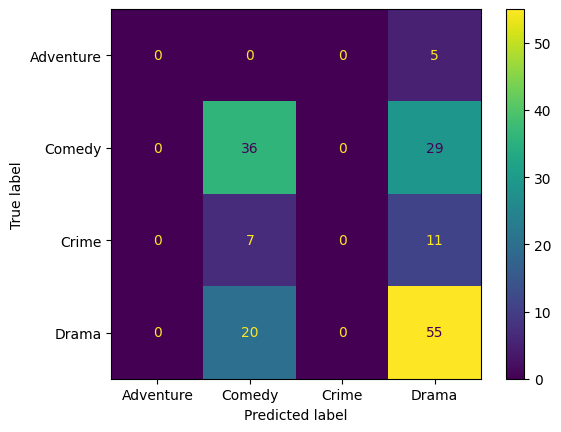

In [22]:
cm = confusion_matrix(y_test_encoded, y_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)
disp.plot()
plt.show()

In [23]:
precision = precision_score(y_test_encoded, y_pred_classes, average='weighted')
recall = recall_score(y_test_encoded, y_pred_classes, average='weighted')
f1 = f1_score(y_test_encoded, y_pred_classes, average='weighted')

print(f'Hassasiyet: {precision}')
print(f'Duyarlılık: {recall}')
print(f'F1-Skoru: {f1}')

Hassasiyet: 0.48093777388255915
Duyarlılık: 0.558282208588957
F1-Skoru: 0.5135297984224364


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
